# Домашнее задание "Продвинутая оптимизация".

### Задание

При фиксированном `seed=42` поэкспериментируйте с параметрами алгоритма [differential_evolution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.differential_evolution.html): strategy, popsize, mutation.

Постройте графики количества итераций (`nit`) оптимизации [функции ackley](https://en.wikipedia.org/wiki/Ackley_function) от значения параметра. 

Подробнее о результате выдачи [тут](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.OptimizeResult.html).

In [66]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [67]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# Задаем границы для переменных
bounds = [(-10, 10), (-10, 10)]

# Запускаем алгоритм дифференциальной эволюции
result = differential_evolution(ackley, bounds, seed=42)
result

 message: Optimization terminated successfully.
 success: True
     fun: 4.440892098500626e-16
       x: [ 0.000e+00  0.000e+00]
     nit: 90
    nfev: 2793

In [68]:
# количество итераций - nit: 90
# количество обращений к целевой функции - nfev: 2793

In [69]:
# Результаты
print("Оптимальные параметры:", result.x)
print("Минимальное значение функции:", result.fun)

Оптимальные параметры: [0. 0.]
Минимальное значение функции: 4.440892098500626e-16


In [70]:
strategies = ['best1bin', 'best1exp']
pop_sizes = [10, 20, 30]
mutations = [0.1, 0.5, 1]

results = {}

for strategy in strategies:
    for popsize in pop_sizes:
        for mutation in mutations:
            result = differential_evolution(
                ackley,
                bounds,
                strategy=strategy,
                popsize=popsize,
                mutation=mutation,
                seed=42)
            results[(strategy, popsize, mutation)] = (result.x, result.fun)
            
print("Оптимальные параметры:", result.x)
print("Минимальное значение функции:", result.fun)

Оптимальные параметры: [0. 0.]
Минимальное значение функции: 4.440892098500626e-16


#### Строим графики зависимости количества итераций от значений каждого из параметра

In [71]:
strategies = ['best1bin', 'best1exp', 'rand1exp', 'randtobest1exp', 'currenttobest1exp', 'best2exp','rand2exp','randtobest1bin', 'currenttobest1bin', 'best2bin', 'rand2bin', 'rand1bin']
pop_sizes = np.arange(1, 100, 10)
mutations = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# по умолчанию: strategy='best1bin', popsize=15, mutation=(0.5, 1)

In [72]:
# Зависимость количества итераций от параметра popsize
results = {}

for popsize in pop_sizes:
    result = differential_evolution(
        ackley,
        bounds,
        popsize=popsize,
        seed=42)
    results[(popsize)] = (result.x, result.fun, result['nit'])

In [73]:
# Выводим результаты
for params, (solution, value, iteration) in results.items():
    print(f"Размер популяции: {params}")
    print(f"Количество итераций: {iteration}")
    print(f"Лучшее решение: {solution}, Значение функции: {value}\n")

Размер популяции: 1
Количество итераций: 7
Лучшее решение: [-2.43520500e-08  9.52166525e-01], Значение функции: 2.5799275570299014

Размер популяции: 11
Количество итераций: 89
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Размер популяции: 21
Количество итераций: 91
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Размер популяции: 31
Количество итераций: 97
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Размер популяции: 41
Количество итераций: 97
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Размер популяции: 51
Количество итераций: 97
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Размер популяции: 61
Количество итераций: 93
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Размер популяции: 71
Количество итераций: 102
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Размер популяции: 81
Количество итераций: 92
Лучшее решение: [0. 0.], Значение функции: 4.

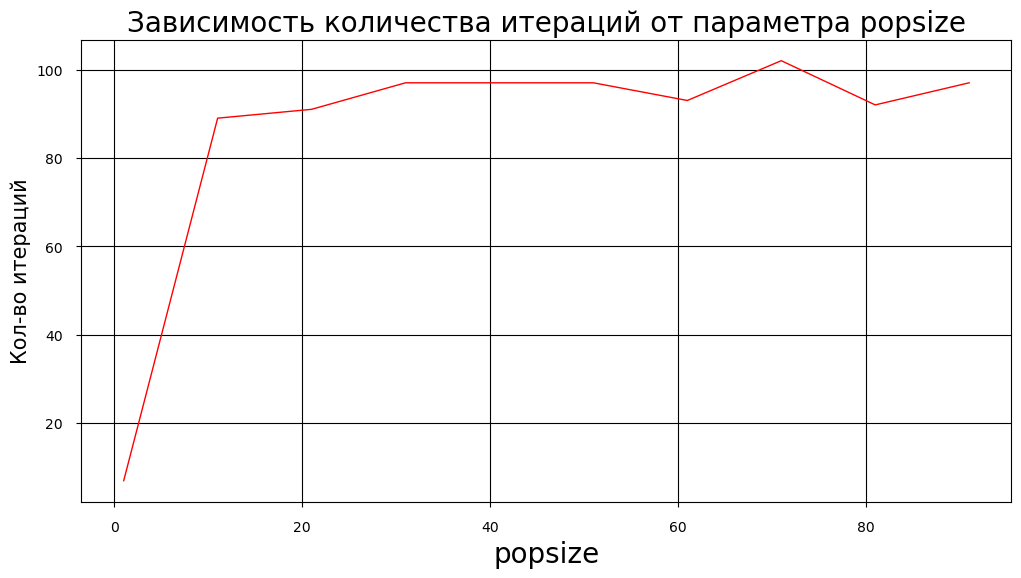

In [74]:
res  =  []
param  =  []
for  i  in pop_sizes:
   res.append(differential_evolution(ackley,  bounds,  popsize=i,  seed=42 )['nit'])
   param.append(i)

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра popsize', size=20)
plt.ylabel('Кол-во итераций', size = 15)
plt.xlabel('popsize', size = 20)
plt.show()

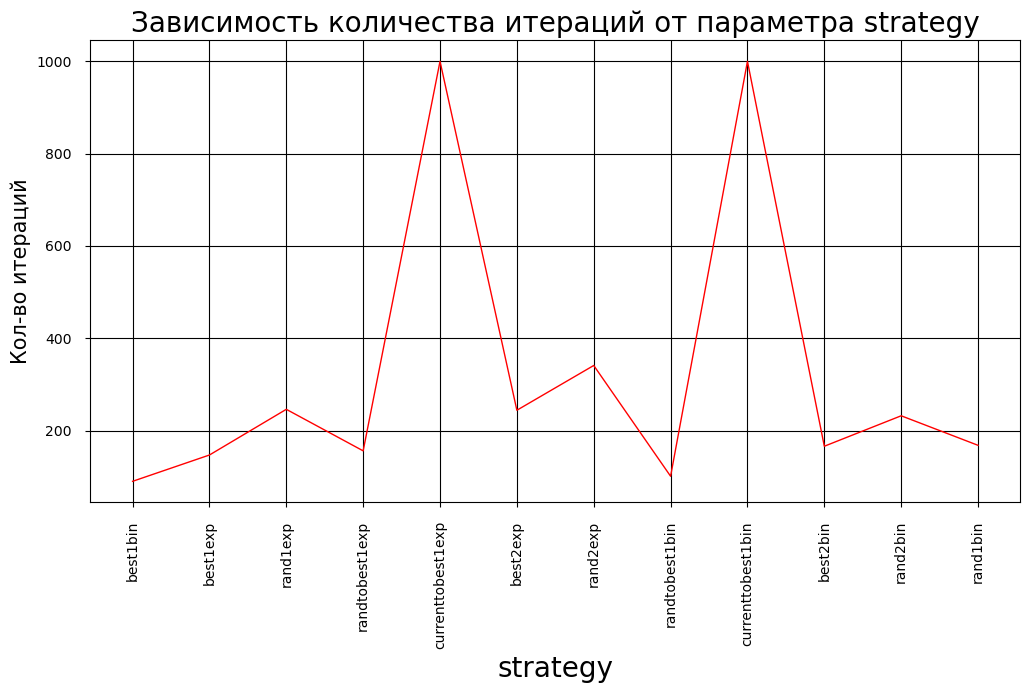

In [75]:
res  =  []
param  =  []
for  i  in strategies:
   res.append(differential_evolution(ackley,  bounds,  strategy=i,  seed=42 )['nit'])
   param.append(i)

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра strategy', size=20)
plt.ylabel('Кол-во итераций', size = 15)
plt.xlabel('strategy', size = 20)
plt.xticks(rotation=90)
plt.show()

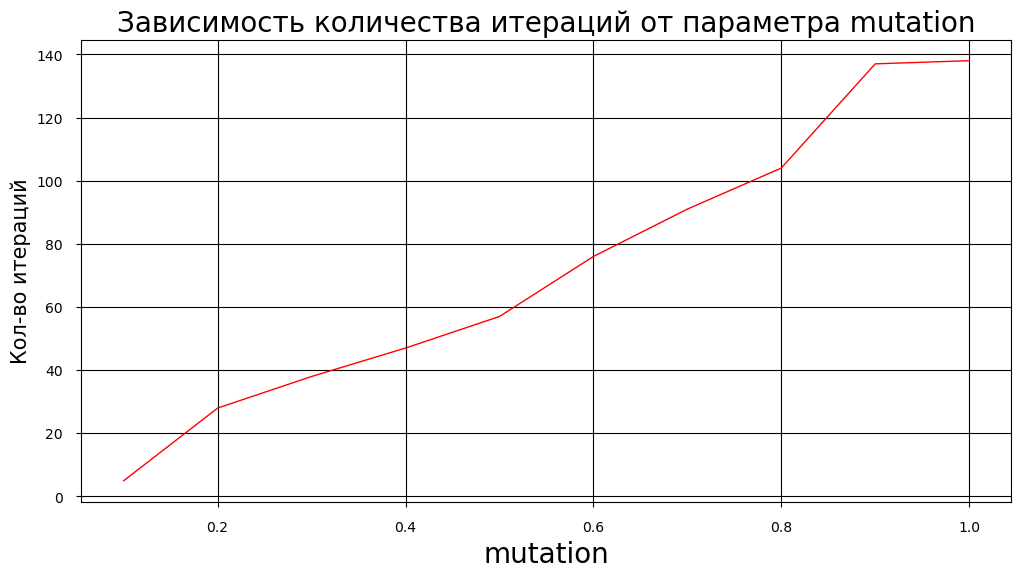

In [76]:
res  =  []
param  =  []
for  i  in mutations:
   res.append(differential_evolution(ackley,  bounds,  mutation=i,  seed=42 )['nit'])
   param.append(i)

fig, ax = plt.subplots()
ax.plot(param,  res, color = 'r', linewidth = 1)
ax.grid(which='major', color = 'k')
ax.tick_params(axis = 'both', pad = 10, labelsize = 10)

fig.set_figwidth(12)
fig.set_figheight(6)

plt.title('Зависимость количества итераций от параметра mutation', size=20)
plt.ylabel('Кол-во итераций', size = 15)
plt.xlabel('mutation', size = 20)
plt.show()

### Дополнительное задание


Поэкспериментируйте с параметрами и оптимизацией через [minimize](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html):

In [77]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.440892098500626e-16
             x: [ 0.000e+00  0.000e+00]
           nit: 8
          nfev: 17
 final_simplex: (array([[ 0.000e+00,  0.000e+00],
                       [-1.607e-05, -8.453e-06],
                       [-1.404e-06, -3.113e-05]]), array([ 4.441e-16,  5.136e-05,  8.816e-05]))

In [78]:
# Начальные точки для оптимизации
a = np.arange(0, 1.5, 0.5)
b = np.arange(0, 1.5, 0.5)

# Методы для оптимизации
methods = ['Nelder-Mead', 'BFGS']

# Храним результаты в словаре
results = {}

for method in methods:
    for a_ in a:
        for b_ in b:
            initial_points = [a_,b_]
            # Запускаем оптимизацию
            result = minimize(ackley, initial_points, method=method)
            # Сохраняем результаты
            results[(method, tuple(initial_points))] = (result.x, result.fun)

# Выводим результаты
for params, (solution, value) in results.items():
    print(f"Метод: {params[0]}, Начальная точка: {params[1]}")
    print(f"Лучшее решение: {solution}, Значение функции: {value}\n")

Метод: Nelder-Mead, Начальная точка: (0.0, 0.0)
Лучшее решение: [0. 0.], Значение функции: 4.440892098500626e-16

Метод: Nelder-Mead, Начальная точка: (0.0, 0.5)
Лучшее решение: [-1.57390308e-05 -1.78643015e-05], Значение функции: 6.735603920704492e-05

Метод: Nelder-Mead, Начальная точка: (0.0, 1.0)
Лучшее решение: [2.32248306e-05 9.52184677e-01], Значение функции: 2.5799275796829595

Метод: Nelder-Mead, Начальная точка: (0.5, 0.0)
Лучшее решение: [-1.78643015e-05 -1.57390308e-05], Значение функции: 6.735603920704492e-05

Метод: Nelder-Mead, Начальная точка: (0.5, 0.5)
Лучшее решение: [1.14809988e-05 1.75089121e-05], Значение функции: 5.9231625052280634e-05

Метод: Nelder-Mead, Начальная точка: (0.5, 1.0)
Лучшее решение: [-4.62327531e-06 -3.45680451e-05], Значение функции: 9.86761686374571e-05

Метод: Nelder-Mead, Начальная точка: (1.0, 0.0)
Лучшее решение: [9.52184677e-01 2.32248306e-05], Значение функции: 2.5799275796829595

Метод: Nelder-Mead, Начальная точка: (1.0, 0.5)
Лучшее реш

Вы также можете поэкспериментировать с [другими методами оптимизации](https://habr.com/ru/company/prequel/blog/568496/), но это не обязательно для зачета.
